In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loader.ImageLoader import ImageLoader
from visualizer.image_visualization import print_grayscale, print_rgb
from denoiser.Denoiser import ImageDenoiser
import numpy as np

In [3]:
loader = ImageLoader("image0.jpg", noise="gaussian")

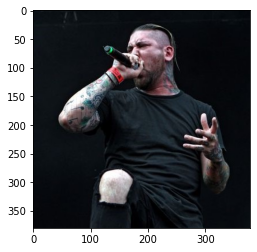

In [4]:
print_rgb(loader.image())


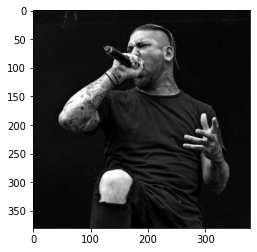

In [5]:
print_grayscale(loader.grayscale())


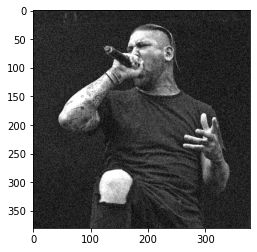

In [6]:
print_grayscale(loader.noisy_image())


In [11]:
graph = loader.graph()
print(list(graph.edges())[1])

((0, 0), (1, 0))


In [12]:
denoiser = ImageDenoiser(graph, loader.noisy_image(), regularization_weight=1)

In [13]:
graph_alpha_beta = denoiser.alpha_beta_swap(max_iter=100)

  0%|          | 0/100 [00:00<?, ?it/s]

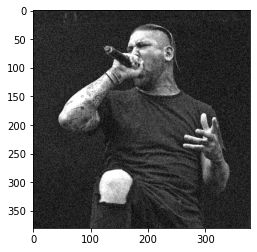

In [ ]:
print_grayscale(denoiser.reconstructed_image)
